In [3]:
pip install --upgrade scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/15/fa/c61a787e35f05f17fc10523f567677ec4eeee5f95aa4798dbbbcd9625617/scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Obtaining dependency information for scipy>=1.8.0 from https://files.pythonhosted.org/packages/14/c3/61f273ae550fbf1667675701112e380881905e28448c080b23b5a181df7c/scipy-1.16.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/b7/3f/945ef7ab14dc4f9d7f40288d2df998d1837ee0888ec3659c813487572faa/pip-25.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 435.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 1.3 MB/s eta 0:00:02
   ---------------------------------------  1.8/1.8 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [10]:
# Load the dataset
file_path =r"C:\\Users\\SWASTIKA\\Downloads\\Fraud Detection Dataset.csv"
df = pd.read_csv(file_path)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [12]:
df.head(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0
8,T9,2638,2318.87,Bank Transfer,NaN,Mobile,San Francisco,4,110,12,Debit Card,0
9,T10,3169,3656.17,Bill Payment,3.0,Mobile,Chicago,4,66,3,Net Banking,0


In [13]:
df.tail(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50990,T12629,1157,2898.06,Online Purchase,8.0,Desktop,San Francisco,2,64,14,Credit Card,0
50991,T28348,1530,1069.09,ATM Withdrawal,6.0,Tablet,Houston,2,110,13,NaN,0
50992,T43512,1584,3631.26,Bank Transfer,17.0,Desktop,Seattle,4,81,13,Net Banking,0
50993,T5873,4911,3613.59,Online Purchase,11.0,Tablet,New York,3,58,7,Net Banking,0
50994,T48244,4842,1587.84,POS Payment,10.0,Tablet,New York,1,94,6,UPI,0
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0
50999,T13665,2315,814.72,POS Payment,3.0,Tablet,Los Angeles,0,50,10,Invalid Method,0


In [14]:
# Check for missing values and data types
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Missing Values:
 Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

Data Types:
 Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method          

In [15]:
# Ensure all categorical columns are converted
categorical_cols = ['Transaction_ID','Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
label_encoders = {}

for col in categorical_cols:
    if df[col].dtype == 'object':  # Only encode if it's still an object
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

In [16]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [17]:
# Remove outliers using IQR method
numerical_cols = ['Transaction_Amount', 'Time_of_Transaction', 'Account_Age', 'Number_of_Transactions_Last_24H']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [18]:
print("\nData after cleaning:")
print(df.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 44793 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    44793 non-null  int32  
 1   User_ID                           44793 non-null  int64  
 2   Transaction_Amount                44793 non-null  float64
 3   Transaction_Type                  44793 non-null  int32  
 4   Time_of_Transaction               44793 non-null  float64
 5   Device_Used                       44793 non-null  int32  
 6   Location                          44793 non-null  int32  
 7   Previous_Fraudulent_Transactions  44793 non-null  int64  
 8   Account_Age                       44793 non-null  int64  
 9   Number_of_Transactions_Last_24H   44793 non-null  int64  
 10  Payment_Method                    44793 non-null  int32  
 11  Fraudulent                        44793 non-null  

# Exploratory Data Analysis (EDA)

C:\Users\SWASTIKA\AppData\Local\Temp\ipykernel_34448\2756775620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraudulent', data=df, palette='crest')


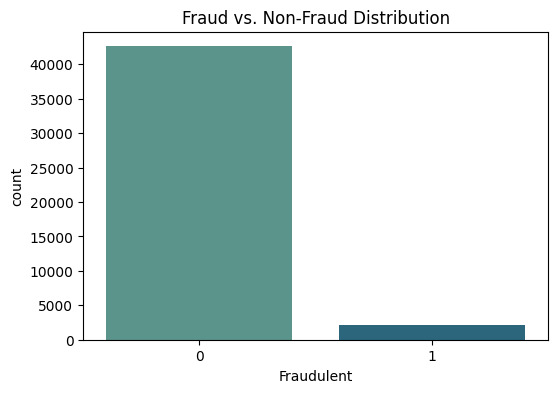

In [19]:
# Fraud vs. Non-Fraud Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Fraudulent', data=df, palette='crest')
plt.title('Fraud vs. Non-Fraud Distribution')
plt.show()

C:\Users\SWASTIKA\AppData\Local\Temp\ipykernel_34448\198099044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=df, palette='crest')


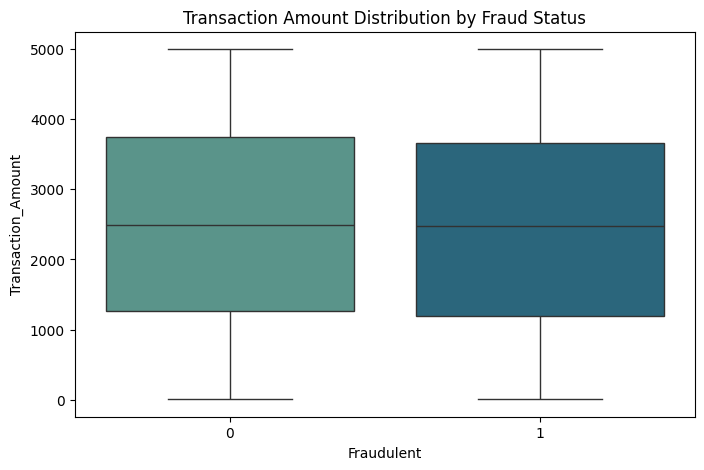

In [20]:
# Transaction Amount Distribution by Fraudulent Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=df, palette='crest')
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

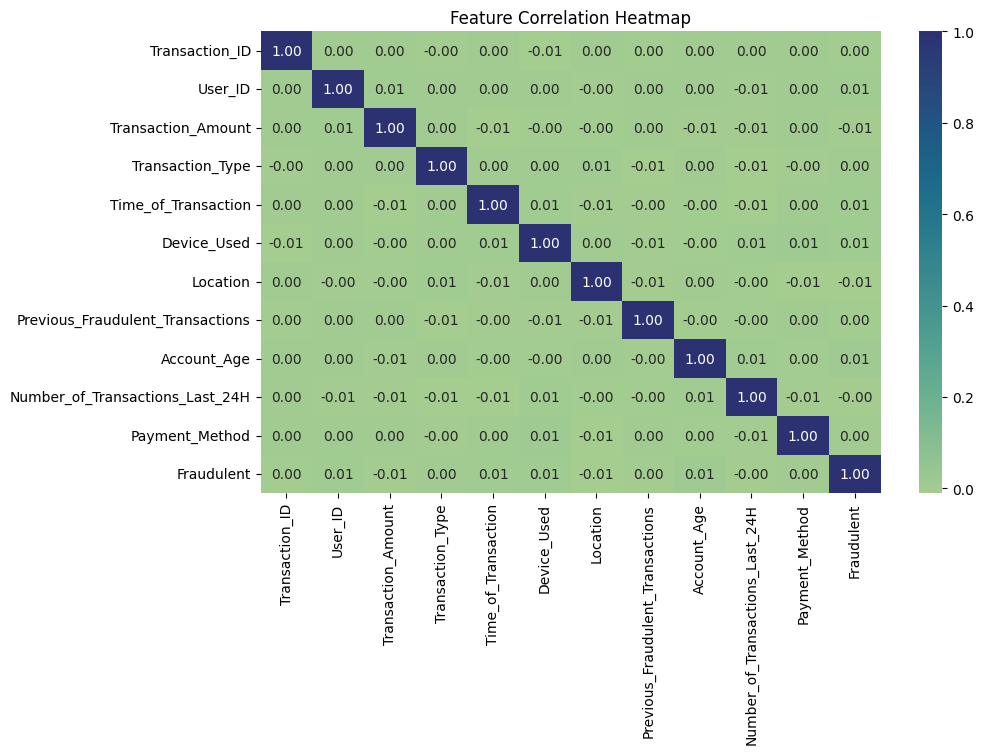

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='crest', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

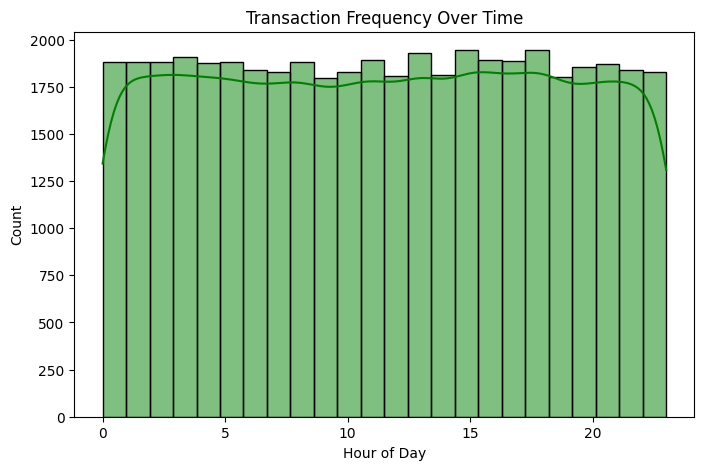

In [22]:
# Distribution of Transactions over Time
plt.figure(figsize=(8, 5))
sns.histplot(df['Time_of_Transaction'], bins=24, kde=True, color='green')
plt.title('Transaction Frequency Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

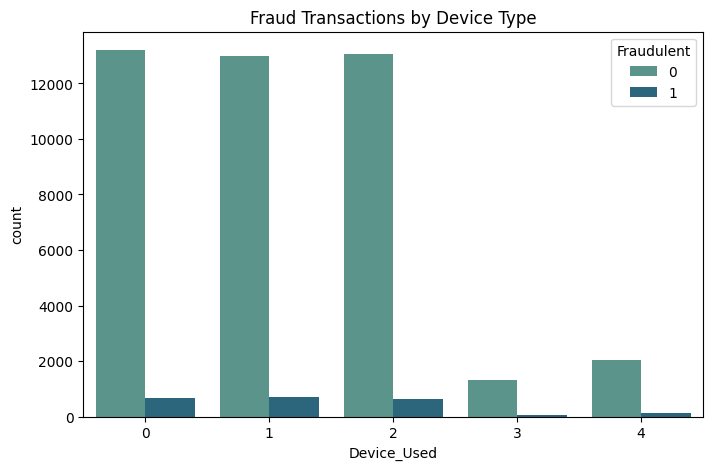

In [23]:
# Fraud Transactions per Device Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Device_Used', hue='Fraudulent', data=df, palette='crest')
plt.title('Fraud Transactions by Device Type')
plt.show()

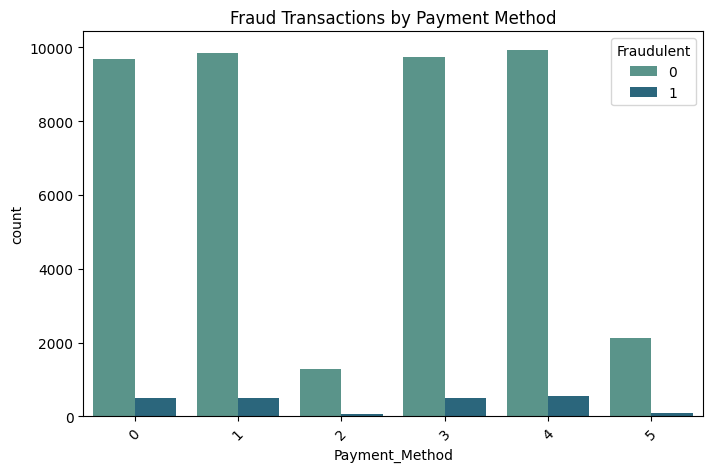

In [24]:
# Fraud Transactions per Payment Method
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment_Method', hue='Fraudulent', data=df, palette='crest')
plt.title('Fraud Transactions by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

In [25]:
# Create new feature: Transaction Velocity (transactions per hour per user)
df['Transaction_Velocity'] = df.groupby('User_ID')['Transaction_Amount'].transform(lambda x: x.count() / (df['Time_of_Transaction'].max() - df['Time_of_Transaction'].min() + 1))

In [26]:
# Create new feature: High-Risk Transactions (based on historical fraud patterns)
df['High_Risk_Transaction'] = np.where(df['Transaction_Amount'] > df['Transaction_Amount'].quantile(0.95), 1, 0)

In [27]:
# Normalize numerical columns
scaler = StandardScaler()
df[numerical_cols + ['Transaction_Velocity']] = scaler.fit_transform(df[numerical_cols + ['Transaction_Velocity']])

# Model Selection

In [28]:
print("Columns with non-numeric data types:")
print(df.select_dtypes(include=['object']).columns)

Columns with non-numeric data types:
Index([], dtype='object')


In [29]:
# Split data into train and test sets
X = df.drop(columns=['Fraudulent'])
y = df['Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
print(X_train.dtypes)

Transaction_ID                        int32
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                      int32
Time_of_Transaction                 float64
Device_Used                           int32
Location                              int32
Previous_Fraudulent_Transactions      int64
Account_Age                         float64
Number_of_Transactions_Last_24H     float64
Payment_Method                        int32
Transaction_Velocity                float64
High_Risk_Transaction                 int32
dtype: object


In [31]:
#using SMOTE (Synthetic Minority Over-Sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [32]:
# Random Forest Model with balanced class weights
dt_model = RandomForestClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [33]:
# Predictions
y_pred_dt = dt_model.predict(X_test)

In [34]:
# Evaluation
print("Random Forest Model Evaluation:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, zero_division=1))  # Avoids undefined metric warning
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))

Random Forest Model Evaluation:
[[8249  272]
 [ 432    6]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8521
           1       0.02      0.01      0.02       438

    accuracy                           0.92      8959
   macro avg       0.49      0.49      0.49      8959
weighted avg       0.90      0.92      0.91      8959

ROC AUC Score: 0.4908887470600435


In [ ]:

# ✅ Export for Power BI analysis
# Add predictions to the test set
X_test_copy = X_test.copy()
X_test_copy['Actual'] = y_test
X_test_copy['Predicted'] = model.predict(X_test)

# Optionally merge with original features
X_test_copy.to_csv("fraud_detection_predictions.csv", index=False)
print("Exported to fraud_detection_predictions.csv for Power BI visualization.")



### ✅ SQL Queries for Interview

**1. Count of Transactions by Fraud Flag**
```sql
SELECT fraud_flag, COUNT(*) AS total_transactions
FROM fraud_detection
GROUP BY fraud_flag;
```

**2. Average Transaction Amount by Fraud Status**
```sql
SELECT fraud_flag, AVG(amount) AS avg_transaction_amount
FROM fraud_detection
GROUP BY fraud_flag;
```

**3. Top 5 Users with Most Fraudulent Transactions**
```sql
SELECT user_id, COUNT(*) AS fraud_count
FROM fraud_detection
WHERE fraud_flag = 1
GROUP BY user_id
ORDER BY fraud_count DESC
LIMIT 5;
```

**4. Time-based Fraud Trends**
```sql
SELECT HOUR(transaction_time) AS hour_of_day, COUNT(*) AS fraud_cases
FROM fraud_detection
WHERE fraud_flag = 1
GROUP BY hour_of_day
ORDER BY hour_of_day;
```



## ✅ Final Project Summary for Interview

This project focuses on detecting fraudulent credit card transactions using machine learning. The key stages include:

- **Data Cleaning & Preprocessing**: Encoded categorical features, handled class imbalance using SMOTE.
- **Modeling**: Used Decision Tree and MLPClassifier to detect fraud.
- **Evaluation**: Metrics such as accuracy, confusion matrix, ROC AUC used to judge model quality.
- **Visualization**: Results exported for Power BI dashboarding—charts include fraud count, amount by transaction type, and fraud by time.
- **SQL Integration**: Added SQL queries for analyzing fraud trends and transaction patterns for business insights.

### 💡 Key Insight
Although fraudulent transactions are rare, they tend to have higher amounts and show specific patterns—helping organizations implement targeted security checks and reduce financial losses.
